# Модуль А. Предобработка количественных данных

Подключим стандартные библиотеки для работы с даннами, а так же отключим предупреждения

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Сбор данных

Загружаем набор данных из csv файла для его анализа

In [2]:
df = pd.read_csv("data/2021_Russian_data.csv")

Выведем и просмотрим первые записи

In [3]:
df.head().T

0                    1                 2  \
SUBJECT                 русский язык         русский язык      русский язык   
YEAR                            2021                 2021              2021   
REGION                        Адыгея               Адыгея            Адыгея   
DATA_AVAILABLE                  True                 True              True   
WINNERS_ONLY                   False                False             False   
GRADE_OF_COMPETITION             9.0                  9.0               9.0   
ID                               1.0                  2.0               3.0   
CODE                             NaN                  NaN               NaN   
DISTRICT                Город Майкоп  Кошехабльский район  Гиагинский район   
SCHOOL                Гимназия No 22             СОШ No 8          СОШ No 4   
T1                               8.5                  4.5               3.0   
T2                               0.0                  0.0               0.0   
T3                               2.0                  2.0               3.0   
T4                               0.0                  0.0               0.0   
T5                               4.0                  5.5               8.5   
T6                               3.5                  4.5               0.0   
T7                               2.0                  2.0               3.0   
T8                               3.5                  1.5               1.0   
SUM                             23.5                 20.0              18.5   
PERCENTAGE                      26.1                 22.2              20.6   
REGIONAL_STATUS                  NaN                  NaN               NaN   
AUTHENTIC                        оба                  оба               оба   
FINAL_SUM                        NaN                  NaN               NaN   
FINAL_PERCENTAGE                 NaN                  NaN               NaN   
FINAL_STATUS                     NaN                  NaN               NaN   
COMMENT                          NaN                  NaN               NaN   

                                            3                        4  
SUBJECT                          русский язык             русский язык  
YEAR                                     2021                     2021  
REGION                                 Адыгея                   Адыгея  
DATA_AVAILABLE                           True                     True  
WINNERS_ONLY                            False                    False  
GRADE_OF_COMPETITION                      9.0                      9.0  
ID                                        4.0                      5.0  
CODE                                      NaN                      NaN  
DISTRICT              Красногвардейский район  Красногвардейский район  
SCHOOL                          Гимназия No 1                 СОШ No 2  
T1                                        5.5                      8.5  
T2                                        1.0                      0.0  
T3                                        1.0                      2.0  
T4                                        3.0                      0.0  
T5                                        5.5                      4.5  
T6                                        0.5                      0.0  
T7                                        0.0                      0.0  
T8                                        1.5                      1.0  
SUM                                      18.0                     16.0  
PERCENTAGE                               20.0                     17.8  
REGIONAL_STATUS                           NaN                      NaN  
AUTHENTIC                                 оба                      оба  
FINAL_SUM                                 NaN                      NaN  
FINAL_PERCENTAGE                          NaN                      NaN  
FINAL_STATUS                              NaN                      NaN  
COM

Сразу можно заметить пропуски и нулевые значения

## Описание структуры набора данных

Описание признаков
* SUBJECT: школьный предмет
* YEAR: год состязания
* REGION: регион России (включая аннексированные Республику Крым и Севастополь)
* DATA_AVAILABLE: имеются ли данные для региона. Данные считались имеющимися, если хотя бы для победителей и призёров регионального этапа известны результаты в баллах или в процентах от теоретического максимума, а не только статусы победителя, призёра и т. п.
* WINNERS_ONLY: представлены ли данные только для участников, получивших дипломы, или для всех участников регионального этапа в данном регионе. NB: для Свердловской области данные в принятом нами смысле имеются только для победителей, однако призёры включены в датасет; выбрано значение TRUE
* GRADE_OF_COMPETITION: класс, задания для которого выполнял участник (9, 10 или 11)
* ID: уникальный идентификатор участника (выбран произвольно)
* CODE: шифр участника на региональном этапем этапе
* DISTRICT: район, город, муниципальное образование и т. д., к которому относится школа участника
* SCHOOL: школа, за которую выступает участник
* T1–T8: оценки участника в баллах за задания 1–8 регионального этапа. Несравнимы между классами!
* SUM: сумма баллов участника за все задания регионального этапа. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 90 баллов, для 10 класса — 100 баллов, для 11 класса —  110 баллов; в 2022 году для 9 класса — 88 баллов, для 10 класса — 100 баллов, для 11 класса —112 баллов
* PERCENTAGE: процент, который сумма баллов участника на региональном этапе составляет от теоретического максимума
* REGIONAL_STATUS: категория, к которой участник отнесён по итогам регионального этапа. Основными являются Победитель, Призер, Участник, а категория, по смыслу совпадающая со статусом Участника. Отнесение следует различным правилам в разных регионах, поэтому в общем случае статусы плохо сравнимы между регионами (для отбора на заключительный этап используются не они, а единый для страны проходной балл)
* AUTHENTIC: какое из значений полей SUM и PERCENTAGE представлено в исходных данных, а какое вычислено при создании датасета. В случаях, когда исходным был процент выполнения (и тем более отсутствовали результаты проверки отдельных заданий), суммы несистематически приводились к разрешённому правилами шагу в 0,5 балла
* FINAL_SUM: сумма баллов участника на заключительном этапе. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 150 баллов, для 10 класса — 165 баллов, для 11 класса — 180 баллов
* FINAL_PERCENTAGE: процент, который сумма баллов участника на заключительном этапе составляет от теоретического максимума
* FINAL_STATUS: категория, к которой участник отнесён по итогам заключительного этапа. Возможные значения: Победитель, Призер, Участник
* COMMENT: неформальный комментарий

Выведем размернось и информацию о наборе данных

In [4]:
df.shape

(12515, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT               12515 non-null  object 
 1   YEAR                  12515 non-null  int64  
 2   REGION                12515 non-null  object 
 3   DATA_AVAILABLE        12515 non-null  bool   
 4   WINNERS_ONLY          12507 non-null  object 
 5   GRADE_OF_COMPETITION  12507 non-null  float64
 6   ID                    12507 non-null  float64
 7   CODE                  3730 non-null   object 
 8   DISTRICT              5918 non-null   object 
 9   SCHOOL                3529 non-null   object 
 10  T1                    3552 non-null   float64
 11  T2                    3552 non-null   float64
 12  T3                    3551 non-null   float64
 13  T4                    3551 non-null   float64
 14  T5                    3552 non-null   float64
 15  T6                 

Видно, что имеется большое количество пропусков, выведем их количество

In [6]:
df.describe(include="all").T

count unique  \
SUBJECT                 12515      1   
YEAR                  12515.0    NaN   
REGION                  12515     85   
DATA_AVAILABLE          12515      2   
WINNERS_ONLY            12507      2   
GRADE_OF_COMPETITION  12507.0    NaN   
ID                    12507.0    NaN   
CODE                     3730   3712   
DISTRICT                 5918    871   
SCHOOL                   3529   1611   
T1                     3552.0    NaN   
T2                     3552.0    NaN   
T3                     3551.0    NaN   
T4                     3551.0    NaN   
T5                     3552.0    NaN   
T6                     3552.0    NaN   
T7                     3552.0    NaN   
T8                     3550.0    NaN   
SUM                   12352.0    NaN   
PERCENTAGE            12351.0    NaN   
REGIONAL_STATUS          9937      7   
AUTHENTIC               12408      3   
FINAL_SUM               289.0    NaN   
FINAL_PERCENTAGE        289.0    NaN   
FINAL_STATUS              289      3   
COMMENT                    63     10   

                                                                    top  \
SUBJECT                                                    русский язык   
YEAR                                                                NaN   
REGION                                                           Москва   
DATA_AVAILABLE                                                     True   
WINNERS_ONLY                                                      False   
GRADE_OF_COMPETITION                                                NaN   
ID                                                                  NaN   
CODE                                                           51-РЯ-11   
DISTRICT                                    Челябинский городской округ   
SCHOOL                Муниципальное бюджетное общеобразовательное уч...   
T1                                                                  NaN   
T2                                                                  NaN   
T3                                                                  NaN   
T4                                                                  NaN   
T5                                                                  NaN   
T6                                                                  NaN   
T7                                                                  NaN   
T8                                                                  NaN   
SUM                                                                 NaN   
PERCENTAGE                                                          NaN   
REGIONAL_STATUS                                                Участник   
AUTHENTIC                                                           оба   
FINAL_SUM                                                           NaN   
FINAL_PERCENTAGE                                                    NaN   
FINAL_STATUS                                                   Участник   
COMMENT                                                сумма исправлена   

                       freq       mean          std     min        25%  \
SUBJECT               12515        NaN          NaN     NaN        NaN   
YEAR                    NaN     2021.0          0.0  2021.0     2021.0   
REGION                 3132        NaN          NaN     NaN        NaN   
DATA_AVAILABLE        12507        NaN          NaN     NaN        NaN   
WINNERS_ONLY          12289        NaN          NaN     NaN        NaN   
GRADE_OF_COMPETITION    NaN   9.990725     0.814417     9.0        9.0   
ID                      NaN     6254.0  3610.604243     1.0     3127.5   
CODE                      2        NaN          NaN     NaN        NaN   
DISTRICT                198        NaN          NaN     NaN        NaN   
SCHOOL                   43        NaN          NaN     NaN        NaN   
T1                      NaN   5.339527     2.205287     0.0        4.0   
T2                      NaN  

In [7]:
df.isna().sum()

SUBJECT                     0
YEAR                        0
REGION                      0
DATA_AVAILABLE              0
WINNERS_ONLY                8
GRADE_OF_COMPETITION        8
ID                          8
CODE                     8785
DISTRICT                 6597
SCHOOL                   8986
T1                       8963
T2                       8963
T3                       8964
T4                       8964
T5                       8963
T6                       8963
T7                       8963
T8                       8965
SUM                       163
PERCENTAGE                164
REGIONAL_STATUS          2578
AUTHENTIC                 107
FINAL_SUM               12226
FINAL_PERCENTAGE        12226
FINAL_STATUS            12226
COMMENT                 12452
dtype: int64

## Предобработка данных

Проверим данный набор данных наличие дубликатов

In [8]:
df.duplicated().sum()

np.int64(0)

В info видно, что многие признаки имеют значение nan.
Важными значениями являются FINAL_SUM, FINAL_PERCENTAGE и FINAL_STATUS, а так же SUM, PERCENTAGE и REGIONAL_STATUS просмотрим и заполним пропуски

In [9]:
df["WINNERS_ONLY"].value_counts(dropna=False)

WINNERS_ONLY
False    12289
True       218
NaN          8
Name: count, dtype: int64

In [10]:
df[df["WINNERS_ONLY"].isna()].T

12055         12056         12057         12058  \
SUBJECT               русский язык  русский язык  русский язык  русский язык   
YEAR                          2021          2021          2021          2021   
REGION                Башкортостан       Бурятия     Ингушетия      Калмыкия   
DATA_AVAILABLE               False         False         False         False   
WINNERS_ONLY                   NaN           NaN           NaN           NaN   
GRADE_OF_COMPETITION           NaN           NaN           NaN           NaN   
ID                             NaN           NaN           NaN           NaN   
CODE                           NaN           NaN           NaN           NaN   
DISTRICT                       NaN           NaN           NaN           NaN   
SCHOOL                         NaN           NaN           NaN           NaN   
T1                             NaN           NaN           NaN           NaN   
T2                             NaN           NaN           NaN           NaN   
T3                             NaN           NaN           NaN           NaN   
T4                             NaN           NaN           NaN           NaN   
T5                             NaN           NaN           NaN           NaN   
T6                             NaN           NaN           NaN           NaN   
T7                             NaN           NaN           NaN           NaN   
T8                             NaN           NaN           NaN           NaN   
SUM                            NaN           NaN           NaN           NaN   
PERCENTAGE                     NaN           NaN           NaN           NaN   
REGIONAL_STATUS                NaN           NaN           NaN           NaN   
AUTHENTIC                      NaN           NaN           NaN           NaN   
FINAL_SUM                      NaN           NaN           NaN           NaN   
FINAL_PERCENTAGE               NaN           NaN           NaN           NaN   
FINAL_STATUS                   NaN           NaN           NaN           NaN   
COMMENT                        NaN           NaN           NaN           NaN   

                             12059         12060         12061  \
SUBJECT               русский язык  русский язык  русский язык   
YEAR                          2021          2021          2021   
REGION                      Якутия     Татарстан         Чечня   
DATA_AVAILABLE               False         False         False   
WINNERS_ONLY                   NaN           NaN           NaN   
GRADE_OF_COMPETITION           NaN           NaN           NaN   
ID                             NaN           NaN           NaN   
CODE                           NaN           NaN           NaN   
DISTRICT                       NaN           NaN           NaN   
SCHOOL                         NaN           NaN           NaN   
T1                             NaN           NaN           NaN   
T2                             NaN           NaN           NaN   
T3                             NaN           NaN           NaN   
T4                             NaN           NaN           NaN   
T5                             NaN           NaN           NaN   
T6                             NaN           NaN           NaN   
T7                             NaN           NaN           NaN   
T8                             NaN           NaN           NaN   
SUM                            NaN           NaN           NaN   
PERCENTAGE                     NaN           NaN           NaN   
REGIONAL_STATUS                NaN           NaN           NaN   
AUTHENTIC                      NaN           NaN           NaN   
FINAL_SUM                      NaN           NaN           NaN   
FINAL_PERCENTAGE               NaN           NaN           NaN   
FINAL_STATUS                   NaN           NaN           NaN   
COMMENT                        NaN           NaN           NaN   

                                    12062  
SUBJECT                      русский язык

Как видно, записи, у которых признак WINNERS_ONLY пропущен не имеют данных, заменим пропуски на False 

In [11]:
df.loc[df["WINNERS_ONLY"].isna(), "WINNERS_ONLY"] = False

Теперь заполним пропуски REGIONAL_STATUS

In [12]:
df["REGIONAL_STATUS"].value_counts(dropna=False)

REGIONAL_STATUS
Участник             6199
Призер               2870
NaN                  2578
неявка                436
Победитель            421
отмечен                 8
дисквалифицирован       2
удален                  1
Name: count, dtype: int64

Признак REGIONAL_STATUS имеет много неопределённых значений, приведём их к 1 виду

In [13]:
df.loc[df["REGIONAL_STATUS"] == False, "REGIONAL_STATUS"] = "Участник" 
df.loc[df["REGIONAL_STATUS"] == "удален", "REGIONAL_STATUS"] = "Дисквалифицирован"
df.loc[df["REGIONAL_STATUS"] == "отмечен", "REGIONAL_STATUS"] = "Участник"

In [14]:
df.loc[df["REGIONAL_STATUS"].isna()].head().T

0                    1                 2  \
SUBJECT                 русский язык         русский язык      русский язык   
YEAR                            2021                 2021              2021   
REGION                        Адыгея               Адыгея            Адыгея   
DATA_AVAILABLE                  True                 True              True   
WINNERS_ONLY                   False                False             False   
GRADE_OF_COMPETITION             9.0                  9.0               9.0   
ID                               1.0                  2.0               3.0   
CODE                             NaN                  NaN               NaN   
DISTRICT                Город Майкоп  Кошехабльский район  Гиагинский район   
SCHOOL                Гимназия No 22             СОШ No 8          СОШ No 4   
T1                               8.5                  4.5               3.0   
T2                               0.0                  0.0               0.0   
T3                               2.0                  2.0               3.0   
T4                               0.0                  0.0               0.0   
T5                               4.0                  5.5               8.5   
T6                               3.5                  4.5               0.0   
T7                               2.0                  2.0               3.0   
T8                               3.5                  1.5               1.0   
SUM                             23.5                 20.0              18.5   
PERCENTAGE                      26.1                 22.2              20.6   
REGIONAL_STATUS                  NaN                  NaN               NaN   
AUTHENTIC                        оба                  оба               оба   
FINAL_SUM                        NaN                  NaN               NaN   
FINAL_PERCENTAGE                 NaN                  NaN               NaN   
FINAL_STATUS                     NaN                  NaN               NaN   
COMMENT                          NaN                  NaN               NaN   

                                            3                        4  
SUBJECT                          русский язык             русский язык  
YEAR                                     2021                     2021  
REGION                                 Адыгея                   Адыгея  
DATA_AVAILABLE                           True                     True  
WINNERS_ONLY                            False                    False  
GRADE_OF_COMPETITION                      9.0                      9.0  
ID                                        4.0                      5.0  
CODE                                      NaN                      NaN  
DISTRICT              Красногвардейский район  Красногвардейский район  
SCHOOL                          Гимназия No 1                 СОШ No 2  
T1                                        5.5                      8.5  
T2                                        1.0                      0.0  
T3                                        1.0                      2.0  
T4                                        3.0                      0.0  
T5                                        5.5                      4.5  
T6                                        0.5                      0.0  
T7                                        0.0                      0.0  
T8                                        1.5                      1.0  
SUM                                      18.0                     16.0  
PERCENTAGE                               20.0                     17.8  
REGIONAL_STATUS                           NaN                      NaN  
AUTHENTIC                                 оба                      оба  
FINAL_SUM                                 NaN                      NaN  
FINAL_PERCENTAGE                          NaN                      NaN  
FINAL_STATUS                              NaN                      NaN  
COM

Как видно, не смотня на не указанный региональный статус данные о участнике имеются, заменим пропуски на "Участник"

In [15]:
df.loc[df["REGIONAL_STATUS"].isna(), "REGIONAL_STATUS"] = "Участник"
df["REGIONAL_STATUS"] = df["REGIONAL_STATUS"].str.capitalize()
df["REGIONAL_STATUS"].unique()

array(['Участник', 'Призер', 'Победитель', 'Дисквалифицирован', 'Неявка'],
      dtype=object)

In [16]:
df["REGIONAL_STATUS"].value_counts(dropna=False)

REGIONAL_STATUS
Участник             8785
Призер               2870
Неявка                436
Победитель            421
Дисквалифицирован       3
Name: count, dtype: int64

In [17]:
df["REGIONAL_STATUS"].value_counts(dropna=False)

REGIONAL_STATUS
Участник             8785
Призер               2870
Неявка                436
Победитель            421
Дисквалифицирован       3
Name: count, dtype: int64

In [18]:
df["FINAL_STATUS"].value_counts(dropna=False)

FINAL_STATUS
NaN           12226
Участник        149
Призер          115
Победитель       25
Name: count, dtype: int64

Так же заменим пропущенные значения FINAL_STATUS на "Не участвовал"

In [19]:
df.loc[df["FINAL_STATUS"].isna(), "FINAL_STATUS"] = "Не участвовал"
df["FINAL_STATUS"].unique()

array(['Не участвовал', 'Участник', 'Призер', 'Победитель'], dtype=object)

Проверим, если ли записи с известным процентом, но не известной суммой баллов и на оборот

In [20]:
df[df['SUM'].isna()]["PERCENTAGE"].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
df[df['PERCENTAGE'].isna()]["SUM"].value_counts()

SUM
39.5    1
Name: count, dtype: int64

Имеется одна подобная запись, отобразим её

In [22]:
df[df['PERCENTAGE'].isna()][df["SUM"] == 39.5].T

1314
SUBJECT                                                    русский язык
YEAR                                                               2021
REGION                                              Челябинская область
DATA_AVAILABLE                                                     True
WINNERS_ONLY                                                      False
GRADE_OF_COMPETITION                                               11.0
ID                                                               1315.0
CODE                                                                NaN
DISTRICT                                     Снежинский_городской_округ
SCHOOL                Муниципальное бюджетное общеобразовательное уч...
T1                                                                  6.0
T2                                                                  1.0
T3                                                                  5.0
T4                                                                  4.5
T5                                                                  0.0
T6                                                                  4.5
T7                                                                 11.5
T8                                                                  7.0
SUM                                                                39.5
PERCENTAGE                                                          NaN
REGIONAL_STATUS                                                  Призер
AUTHENTIC                                                           оба
FINAL_SUM                                                           NaN
FINAL_PERCENTAGE                                                    NaN
FINAL_STATUS                                              Не участвовал
COMMENT                                                             NaN

Имеется только одна подобная запись, вычислим для неё значение

In [23]:
df.loc[df["PERCENTAGE"].isna(), "PERCENTAGE"] = df.loc[df["PERCENTAGE"].isna(), "SUM"] / 110 * 100

Простотрим остальные пропуски

In [24]:
df[df["GRADE_OF_COMPETITION"].isna()].head().T

12055          12056          12057  \
SUBJECT                русский язык   русский язык   русский язык   
YEAR                           2021           2021           2021   
REGION                 Башкортостан        Бурятия      Ингушетия   
DATA_AVAILABLE                False          False          False   
WINNERS_ONLY                  False          False          False   
GRADE_OF_COMPETITION            NaN            NaN            NaN   
ID                              NaN            NaN            NaN   
CODE                            NaN            NaN            NaN   
DISTRICT                        NaN            NaN            NaN   
SCHOOL                          NaN            NaN            NaN   
T1                              NaN            NaN            NaN   
T2                              NaN            NaN            NaN   
T3                              NaN            NaN            NaN   
T4                              NaN            NaN            NaN   
T5                              NaN            NaN            NaN   
T6                              NaN            NaN            NaN   
T7                              NaN            NaN            NaN   
T8                              NaN            NaN            NaN   
SUM                             NaN            NaN            NaN   
PERCENTAGE                      NaN            NaN            NaN   
REGIONAL_STATUS            Участник       Участник       Участник   
AUTHENTIC                       NaN            NaN            NaN   
FINAL_SUM                       NaN            NaN            NaN   
FINAL_PERCENTAGE                NaN            NaN            NaN   
FINAL_STATUS          Не участвовал  Не участвовал  Не участвовал   
COMMENT                         NaN            NaN            NaN   

                              12058          12059  
SUBJECT                русский язык   русский язык  
YEAR                           2021           2021  
REGION                     Калмыкия         Якутия  
DATA_AVAILABLE                False          False  
WINNERS_ONLY                  False          False  
GRADE_OF_COMPETITION            NaN            NaN  
ID                              NaN            NaN  
CODE                            NaN            NaN  
DISTRICT                        NaN            NaN  
SCHOOL                          NaN            NaN  
T1                              NaN            NaN  
T2                              NaN            NaN  
T3                              NaN            NaN  
T4                              NaN            NaN  
T5                              NaN            NaN  
T6                              NaN            NaN  
T7                              NaN            NaN  
T8                              NaN            NaN  
SUM                             NaN            NaN  
PERCENTAGE                      NaN            NaN  
REGIONAL_STATUS            Участник       Участник  
AUTHENTIC                       NaN            NaN  
FINAL_SUM                       NaN            NaN  
FINAL_PERCENTAGE                NaN            NaN  
FINAL_STATUS          Не участвовал  Не участвовал  
COMMENT                         NaN            NaN

Как видно, некоторые записи имеют пропуски, заменим на 9 класс

In [25]:
df.loc[df["GRADE_OF_COMPETITION"].isna(), "GRADE_OF_COMPETITION"] = 9

In [26]:
df[df["AUTHENTIC"].isna()].head().T

12055          12056          12057  \
SUBJECT                русский язык   русский язык   русский язык   
YEAR                           2021           2021           2021   
REGION                 Башкортостан        Бурятия      Ингушетия   
DATA_AVAILABLE                False          False          False   
WINNERS_ONLY                  False          False          False   
GRADE_OF_COMPETITION            9.0            9.0            9.0   
ID                              NaN            NaN            NaN   
CODE                            NaN            NaN            NaN   
DISTRICT                        NaN            NaN            NaN   
SCHOOL                          NaN            NaN            NaN   
T1                              NaN            NaN            NaN   
T2                              NaN            NaN            NaN   
T3                              NaN            NaN            NaN   
T4                              NaN            NaN            NaN   
T5                              NaN            NaN            NaN   
T6                              NaN            NaN            NaN   
T7                              NaN            NaN            NaN   
T8                              NaN            NaN            NaN   
SUM                             NaN            NaN            NaN   
PERCENTAGE                      NaN            NaN            NaN   
REGIONAL_STATUS            Участник       Участник       Участник   
AUTHENTIC                       NaN            NaN            NaN   
FINAL_SUM                       NaN            NaN            NaN   
FINAL_PERCENTAGE                NaN            NaN            NaN   
FINAL_STATUS          Не участвовал  Не участвовал  Не участвовал   
COMMENT                         NaN            NaN            NaN   

                              12058          12059  
SUBJECT                русский язык   русский язык  
YEAR                           2021           2021  
REGION                     Калмыкия         Якутия  
DATA_AVAILABLE                False          False  
WINNERS_ONLY                  False          False  
GRADE_OF_COMPETITION            9.0            9.0  
ID                              NaN            NaN  
CODE                            NaN            NaN  
DISTRICT                        NaN            NaN  
SCHOOL                          NaN            NaN  
T1                              NaN            NaN  
T2                              NaN            NaN  
T3                              NaN            NaN  
T4                              NaN            NaN  
T5                              NaN            NaN  
T6                              NaN            NaN  
T7                              NaN            NaN  
T8                              NaN            NaN  
SUM                             NaN            NaN  
PERCENTAGE                      NaN            NaN  
REGIONAL_STATUS            Участник       Участник  
AUTHENTIC                       NaN            NaN  
FINAL_SUM                       NaN            NaN  
FINAL_PERCENTAGE                NaN            NaN  
FINAL_STATUS          Не участвовал  Не участвовал  
COMMENT                         NaN            NaN

Так же заменим пустые записи AUTHENTIC. Так как имеются записи с значением "оба", но они не содержат данных, так же заменим на это значение, что бы не создавать большое количество различных значений

In [27]:
df.loc[df["AUTHENTIC"].isna(), "AUTHENTIC"] = "оба"

Записи с пропущеными значениями в признаках PERCENTAGE, FINAL_PERCENTAGE, SUM, FINAL_SUM и T1 - T8 заполним нулями

In [28]:
for i in ["PERCENTAGE", "FINAL_PERCENTAGE", "SUM", "FINAL_SUM", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]:
    df.loc[df[i].isna(), i] = 0

Рассмотрим комментарии

In [29]:
df["COMMENT"].value_counts()

COMMENT
сумма исправлена                            12
сумма меньше на 1.5                          9
сумма меньше на 1                            8
процент исправлен                            7
до апелляции?                                7
апелляция к неуказанным заданиям             7
сумма меньше на 0.5                          4
сумма больше на 1                            4
на заключительном этапе в команде Москвы     3
сумма меньше на 2                            2
Name: count, dtype: int64

Заполним оставшиеся пропущенные значения

In [30]:
df.loc[df["ID"].isna(), "ID"] = 0
df.loc[df["CODE"].isna(), "CODE"] = "00-00"

df.loc[df["COMMENT"].isna(), "COMMENT"] = ""
df.loc[df["SCHOOL"].isna(), "SCHOOL"] = "Неизвестна"
df.loc[df["DISTRICT"].isna(), "DISTRICT"] = "Неизвестен"

In [31]:
df["WINNERS_ONLY"] = df["WINNERS_ONLY"].astype(bool)
df["GRADE_OF_COMPETITION"] = df["GRADE_OF_COMPETITION"].astype("int64")

In [32]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 12515 non-null  int64  
 1   SUBJECT               12515 non-null  object 
 2   YEAR                  12515 non-null  int64  
 3   REGION                12515 non-null  object 
 4   DATA_AVAILABLE        12515 non-null  bool   
 5   WINNERS_ONLY          12515 non-null  bool   
 6   GRADE_OF_COMPETITION  12515 non-null  int64  
 7   ID                    12515 non-null  float64
 8   CODE                  12515 non-null  object 
 9   DISTRICT              12515 non-null  object 
 10  SCHOOL                12515 non-null  object 
 11  T1                    12515 non-null  float64
 12  T2                    12515 non-null  float64
 13  T3                    12515 non-null  float64
 14  T4                    12515 non-null  float64
 15  T5                 

In [33]:
df.to_csv("Ansver 1 session.csv", index=False)

Был загружен набор данных, предоставлено подробное описиние для каждого атрибута.
Присутствует информация о количестве пустых значений для каждого атрибута.

Набор данных был очищен от ошибок и аномалий, была проведена замена пропущенных значений 
Признаки REGIONAL_STATUS и FINAL_STATUS приведены к одному стилю.
Заполнены пропуски численных признаков.

Так же было выполнено преобразование типов данных.
В результате чего, в наборе данных не осталось пропусков, что позволит полноценно проанализировать данные
Набор данных сохранён в файле treated_2021_Russian_data.csv.

# Модуль Б. Анализ количественных данных

## Анализ основных свойств данных 

Просмотрим основные статистические характеристики всех признаков

In [34]:
df.describe(include="all").T

count unique            top   freq         mean  \
index                 12515.0    NaN            NaN    NaN       6257.0   
SUBJECT                 12515      1   русский язык  12515          NaN   
YEAR                  12515.0    NaN            NaN    NaN       2021.0   
REGION                  12515     85         Москва   3132          NaN   
DATA_AVAILABLE          12515      2           True  12507          NaN   
WINNERS_ONLY            12515      2          False  12297          NaN   
GRADE_OF_COMPETITION  12515.0    NaN            NaN    NaN     9.990092   
ID                    12515.0    NaN            NaN    NaN  6250.002237   
CODE                    12515   3713          00-00   8785          NaN   
DISTRICT                12515    872     Неизвестен   6597          NaN   
SCHOOL                  12515   1612     Неизвестна   8986          NaN   
T1                    12515.0    NaN            NaN    NaN     1.515461   
T2                    12515.0    NaN            NaN    NaN     0.295206   
T3                    12515.0    NaN            NaN    NaN     1.060687   
T4                    12515.0    NaN            NaN    NaN      0.51825   
T5                    12515.0    NaN            NaN    NaN     1.026249   
T6                    12515.0    NaN            NaN    NaN     0.726768   
T7                    12515.0    NaN            NaN    NaN     0.785897   
T8                    12515.0    NaN            NaN    NaN     1.040679   
SUM                   12515.0    NaN            NaN    NaN    26.006554   
PERCENTAGE            12515.0    NaN            NaN    NaN    26.079741   
REGIONAL_STATUS         12515      5       Участник   8785          NaN   
AUTHENTIC               12515      3            оба   7834          NaN   
FINAL_SUM             12515.0    NaN            NaN    NaN     2.054974   
FINAL_PERCENTAGE      12515.0    NaN            NaN    NaN     1.238291   
FINAL_STATUS            12515      4  Не участвовал  12226          NaN   
COMMENT                 12515     11                 12452          NaN   

                              std     min     25%     50%     75%        max  
index                 3612.913644     0.0  3128.5  6257.0  9385.5    12514.0  
SUBJECT                       NaN     NaN     NaN     NaN     NaN        NaN  
YEAR                          0.0  2021.0  2021.0  2021.0  2021.0     2021.0  
REGION                        NaN     NaN     NaN     NaN     NaN        NaN  
DATA_AVAILABLE                NaN     NaN     NaN     NaN     NaN        NaN  
WINNERS_ONLY                  NaN     NaN     NaN     NaN     NaN        NaN  
GRADE_OF_COMPETITION     0.814542     9.0     9.0    10.0    11.0       11.0  
ID                    3612.909772     0.0  3121.5  6250.0  9378.5    12507.0  
CODE                          NaN     NaN     NaN     NaN     NaN        NaN  
DISTRICT                      NaN     NaN     NaN     NaN     NaN        NaN  
SCHOOL                        NaN     NaN     NaN     NaN     NaN        NaN  
T1                       2.678751     0.0     0.0     0.0     2.5       14.0  
T2                       1.083243     0.0     0.0     0.0     0.0       13.0  
T3                       2.355071     0.0     0.0     0.0     0.0       12.0  
T4                       1.557473     0.0     0.0     0.0     0.0       11.5  
T5                       2.166028     0.0     0.0     0.0     0.0       16.0  
T6                       1.624536     0.0     0.0     0.0     0.0       12.0  
T7                       2.000501     0.0     0.0     0.0     0.0       14.0  
T8                       2.415962     0.0     0.0     0.0     0.0       18.5  
SUM                     15.702783     0.0    14.5    24.0    35.5       96.5  
PERCENTAGE              15.675714     0.0    14.5   24.09   35.53       90.0  
REGIONAL_STATUS               NaN     NaN     NaN     NaN     NaN        NaN  
AUTHENTIC                     NaN     NaN     NaN     NaN     NaN        NaN  
FINAL_SUM               13.

* SUBJECT - содержит только 1 уникальное значение "русский язык"
* YEAR - содержит только 1 уникальное значение 2021
* GRADE_OF_COMPETITION - значения от 9 до 11
* CODE - имеются повторения, возможно некоторые участники участвовали несколько раз
* REGIONAL_STATUS - 7 уникальных значений
* FINAL_STATUS - 3 уникальных зачения

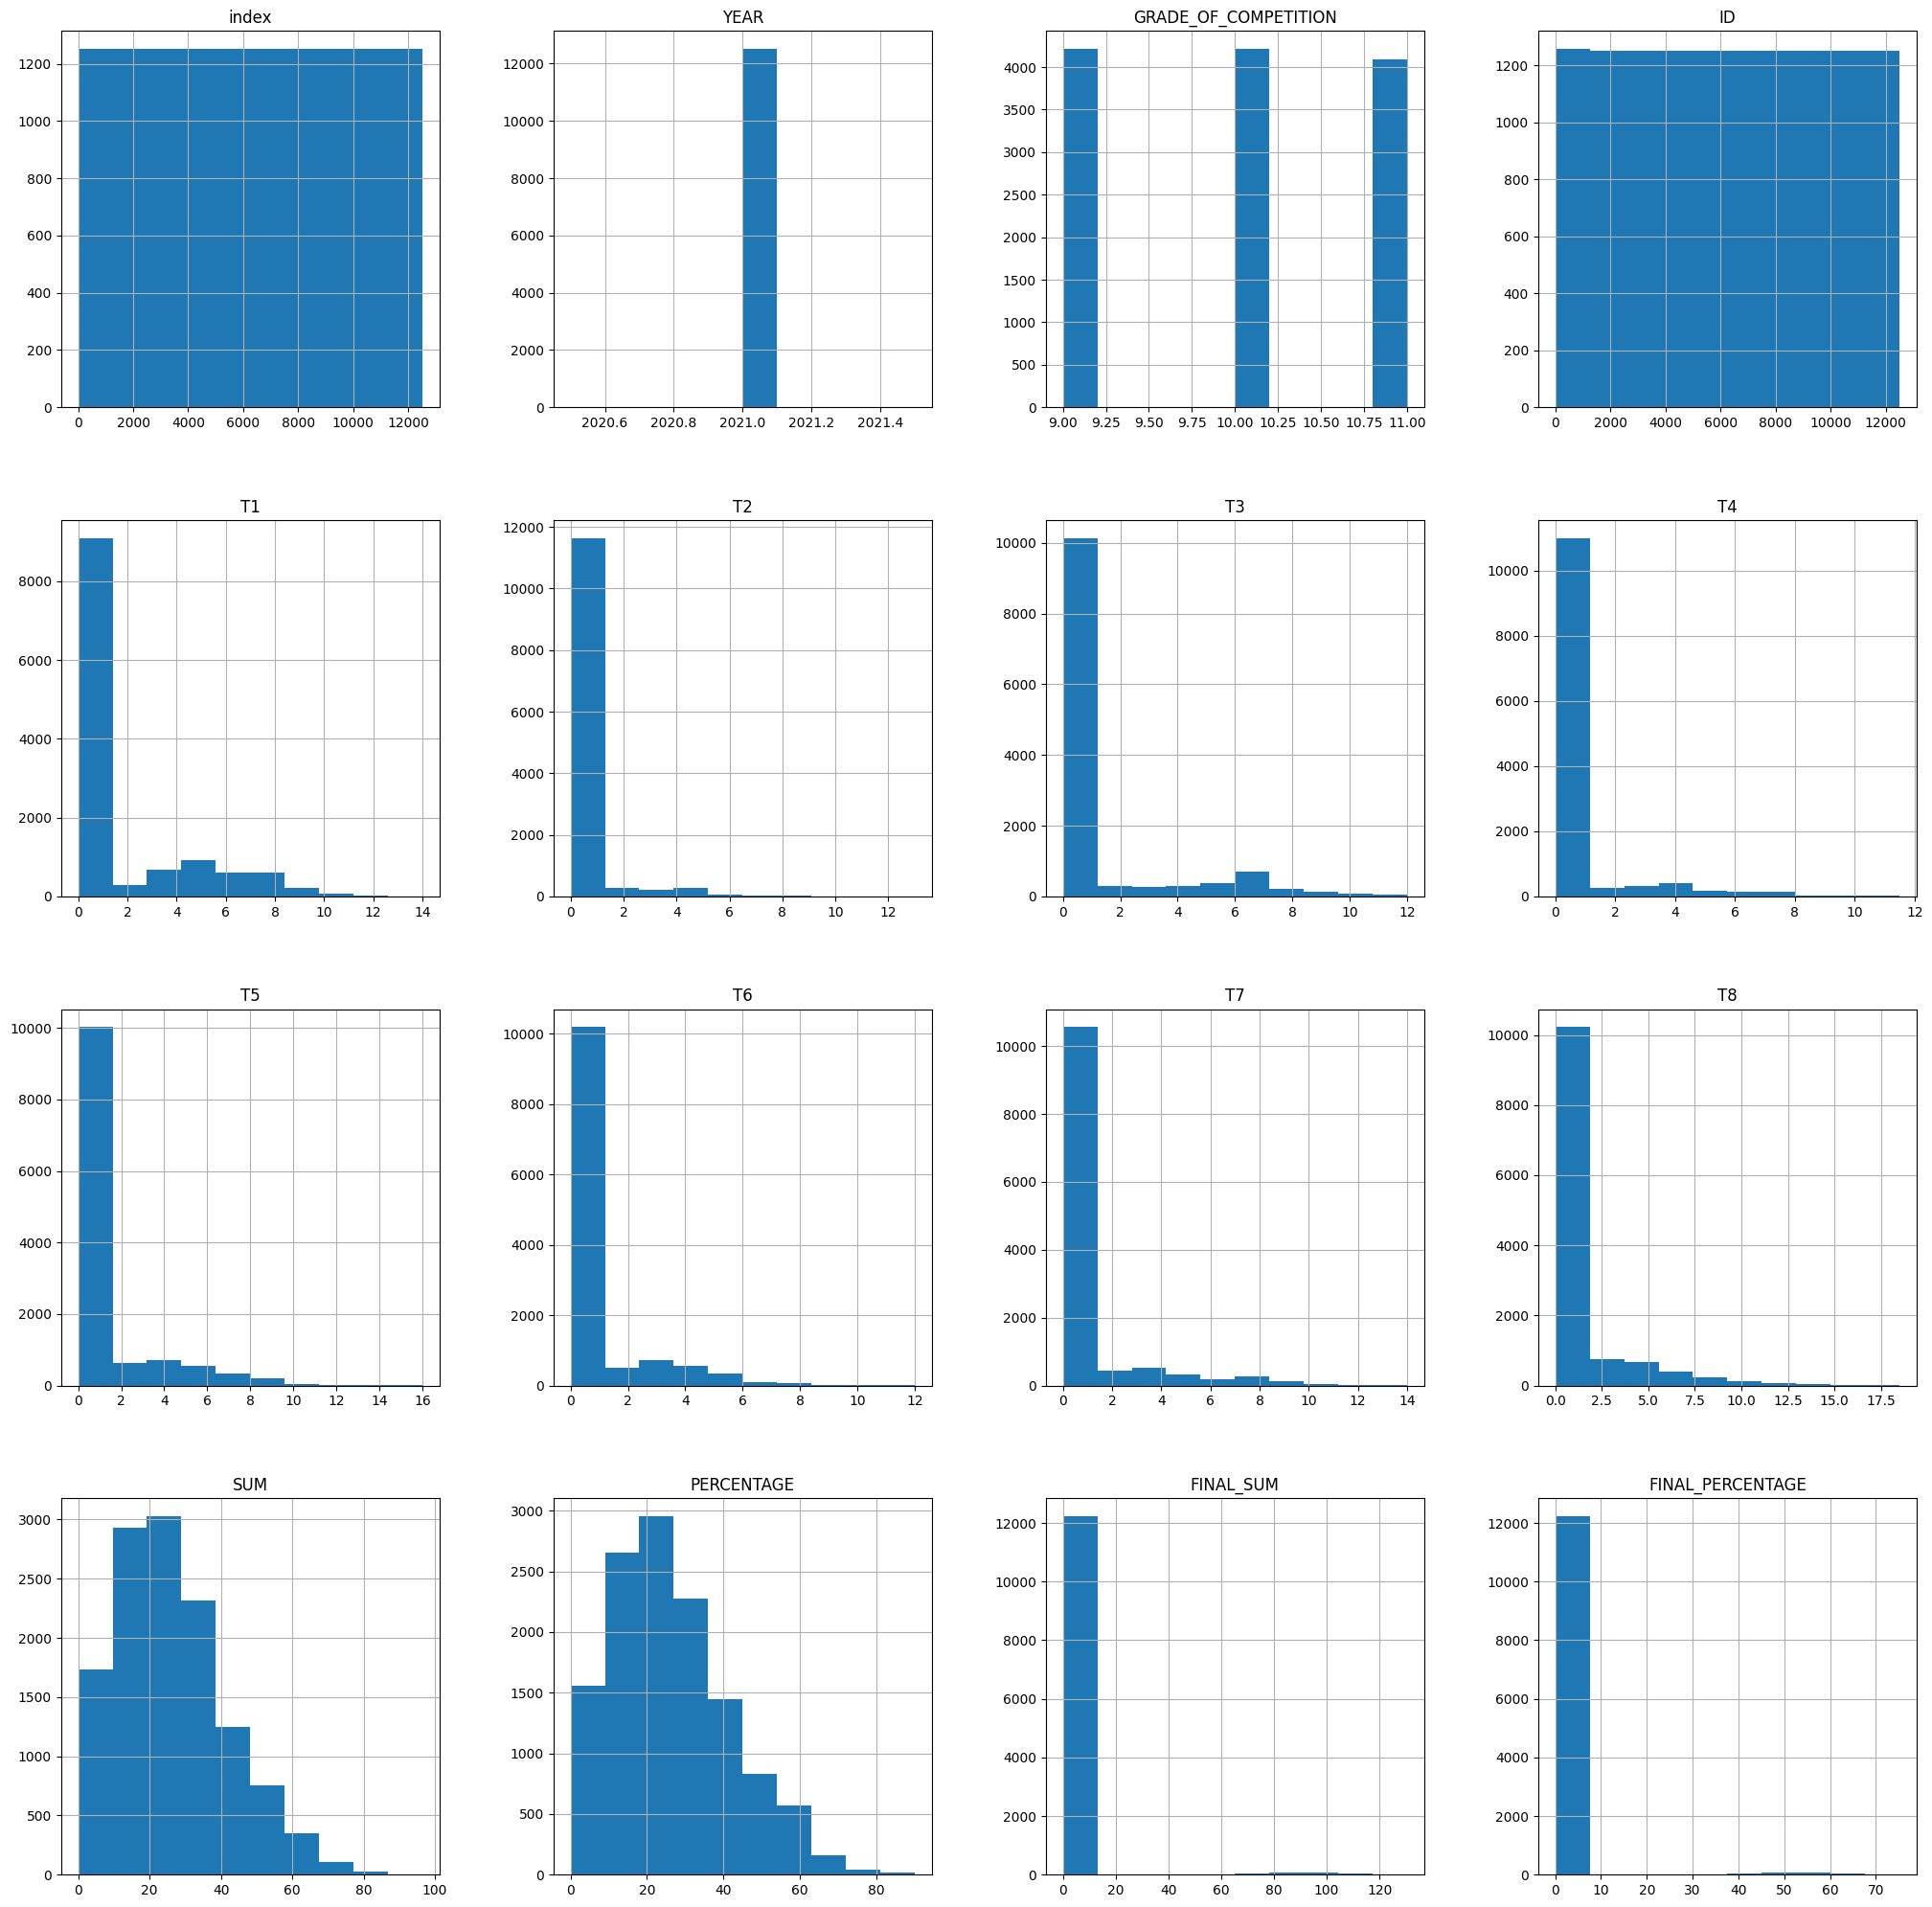

In [35]:
df.hist(figsize=(25, 25));
plt.show()

Распределение большинства признаков близко не похоже на нормальное, однако признаки SUM и PERCENTAGE имеют распределение, похожее на нормальное, построем дополнительные графики для определения, является ли распределение SUM и PERCENTAGE нормальным

Импротируем библиотеки

In [ ]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [36]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


SUM:
ShapiroResult(statistic=np.float64(0.9595452756508516), pvalue=np.float64(4.557590999310607e-49))
NormaltestResult(statistic=np.float64(902.7994559945719), pvalue=np.float64(9.111481509114269e-197))


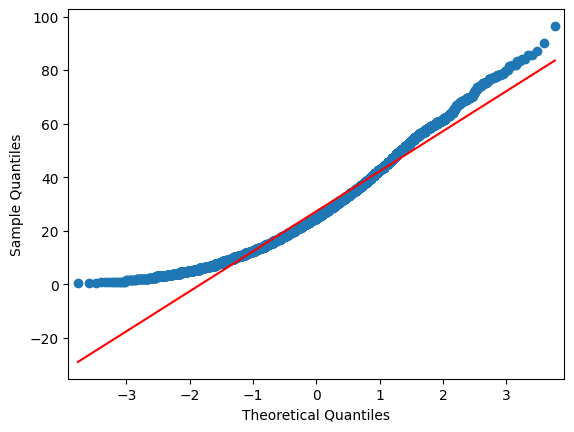


PERCENTAGE:
ShapiroResult(statistic=np.float64(0.9603728707440092), pvalue=np.float64(1.0328344833563e-48))
NormaltestResult(statistic=np.float64(872.5931802021836), pvalue=np.float64(3.302162535965278e-190))


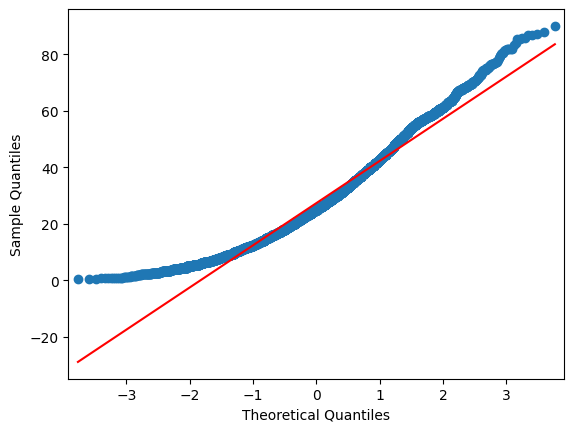

In [37]:
for i in ["SUM", "PERCENTAGE"]:
    print(f"{i}:")

    # Будем использовать критерий Шапиро-Уилка и Д’Агостино для принятие финального решения о нормальности распределения
    print(stats.shapiro(df[df[i] != 0][i]))
    print(stats.normaltest(df[df[i] != 0][i]))
    
    # Строим qqplot
    qqplot(df[df[i] != 0][i], line='s')
    pyplot.show()

Имеются большие хвосты на qqplot. 
А так же, не смотря на высокое значение stat, p-значение очень низкое ( < 0.05), поэтому распределение обоих признаков нельзя назвать нормальным.

Построим pairplot для визуального определения зависимостей

<Figure size 1000x1000 with 0 Axes>

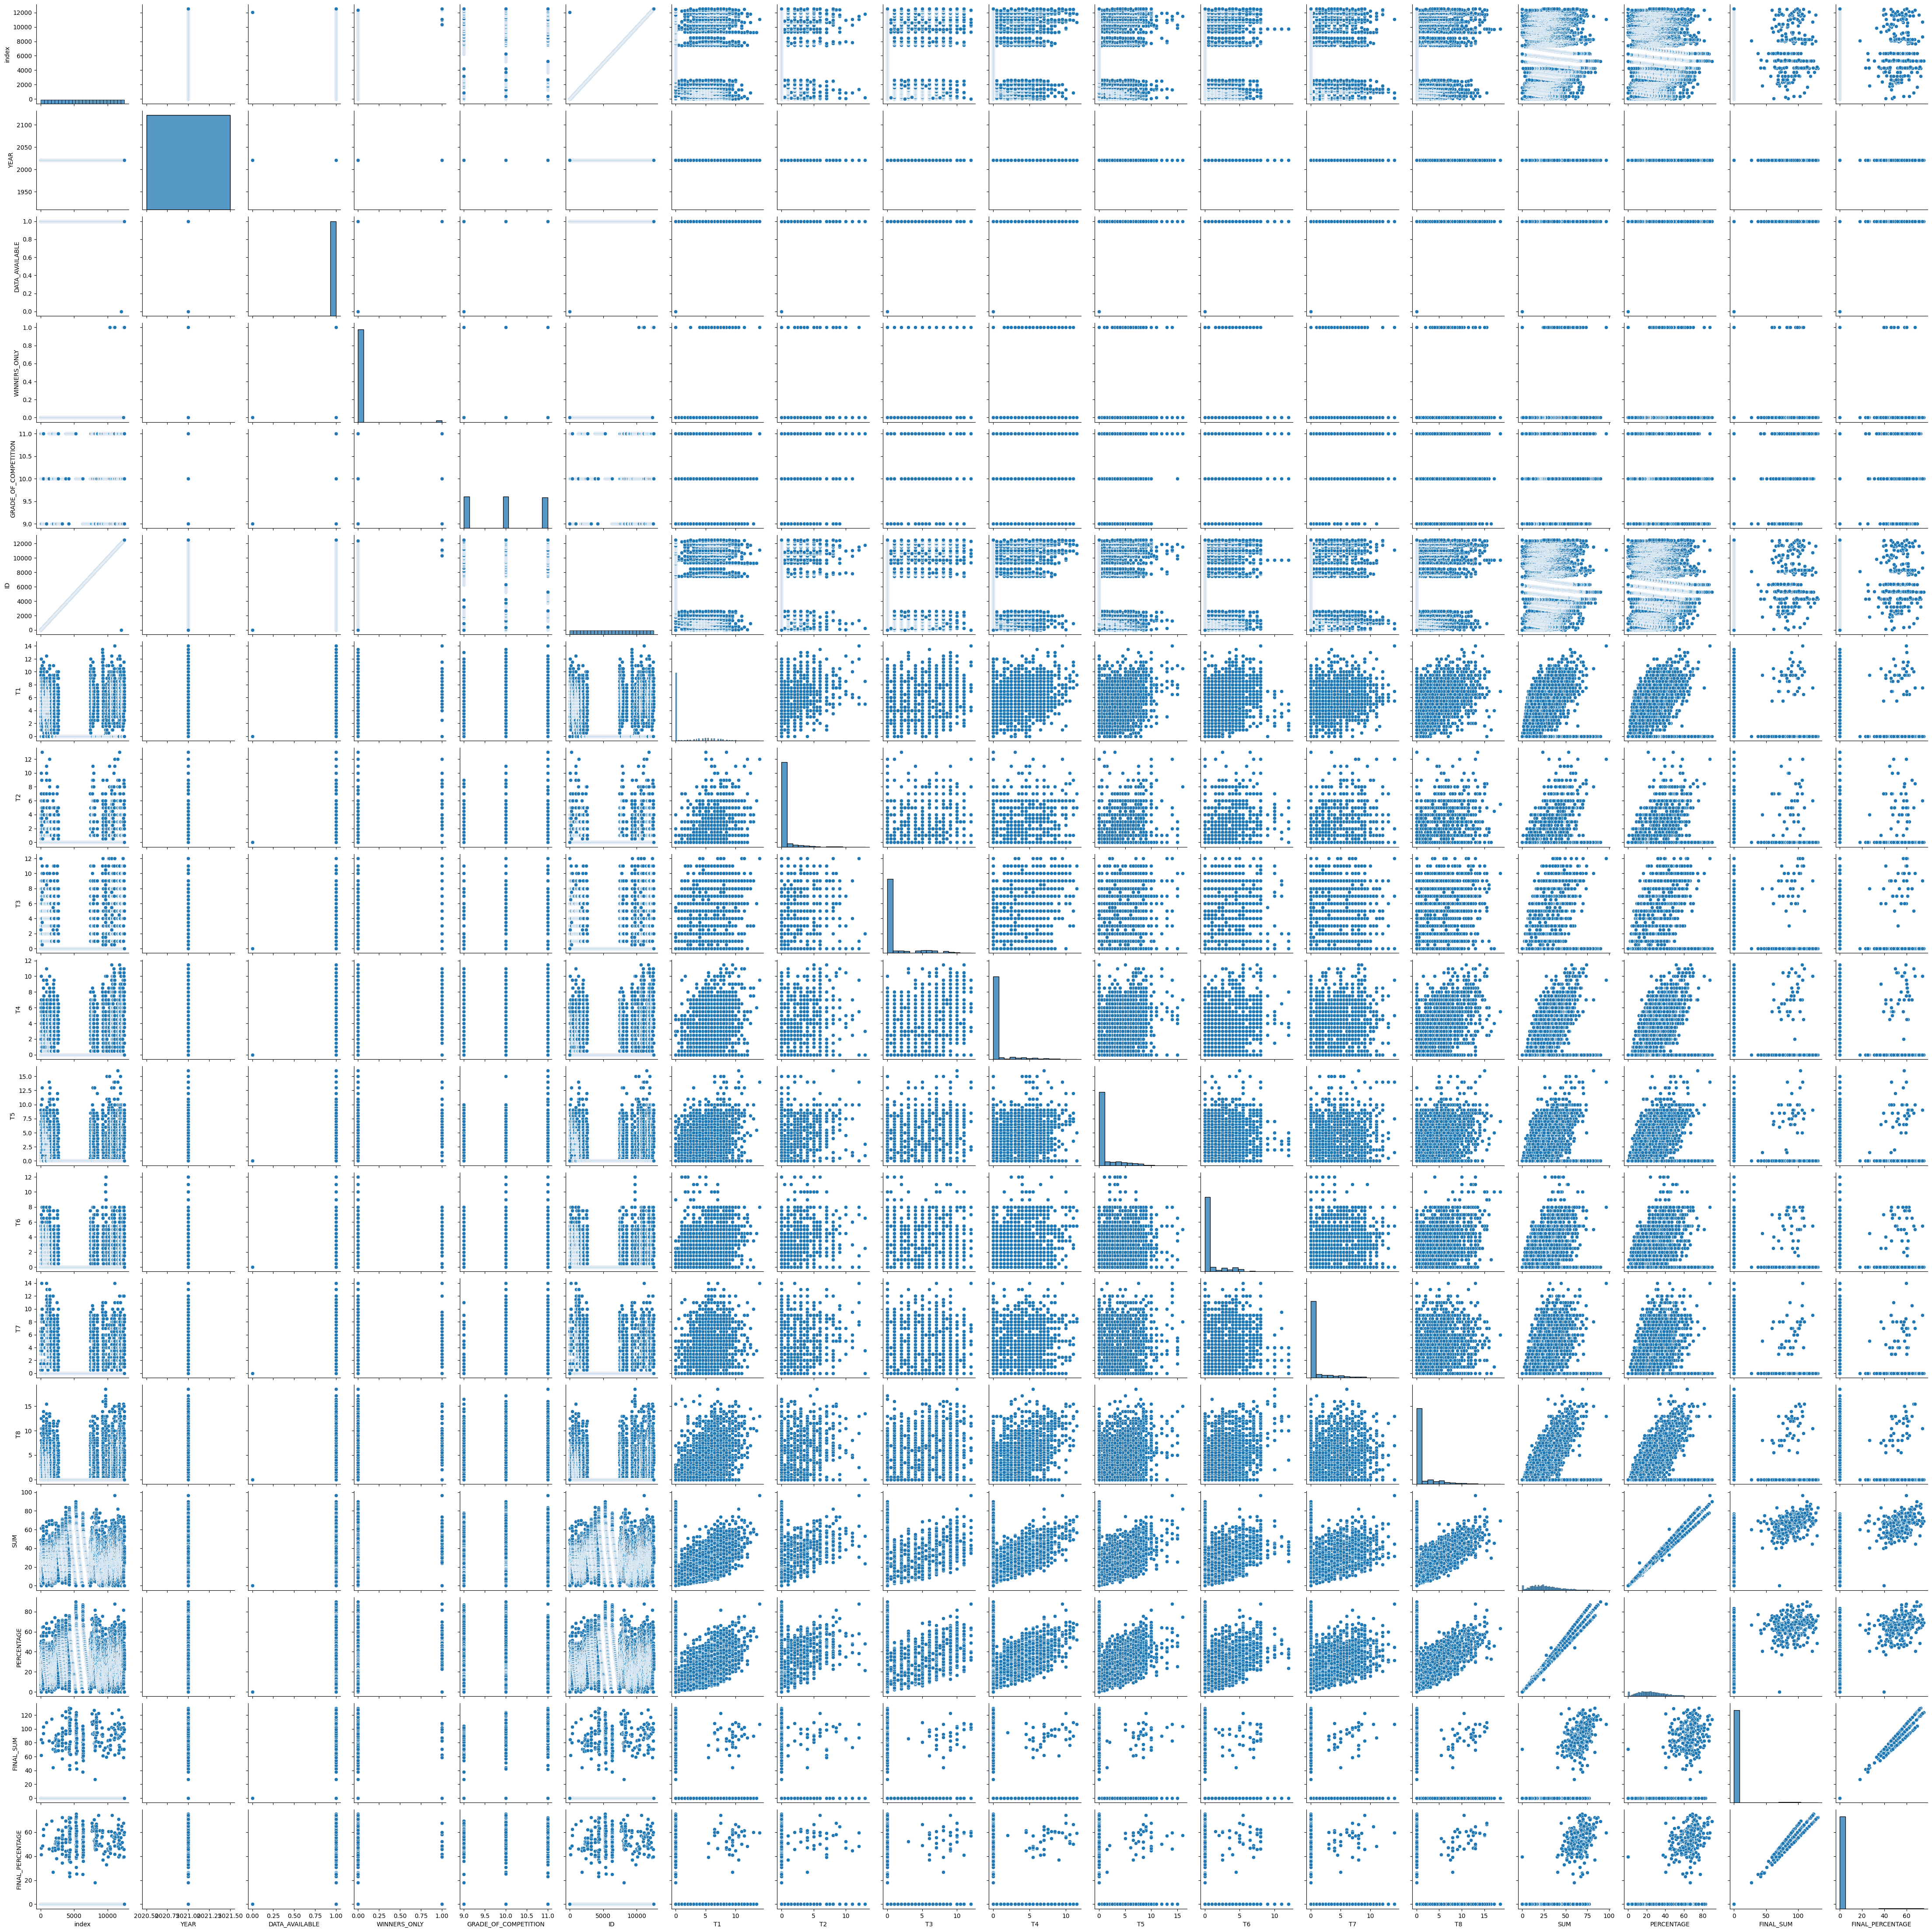

In [38]:
plt.figure(figsize=(10, 10));
sns.pairplot(df);
plt.show()

На данном графике видно, что такие признаки как SUM и PERCENTAGE сильно зависят друг от друга (практически прямая зависимость),
так же виднеется зависимость между признаками T1-T8, так же есть зависимость между T1-T8 и SUM & PERCENTAGE, однако имеется много записей со значением 0, поэтопу корреляция может быть не очень высокой

FINAL_SUM и FINAL_PERCENTAGE так же как и SUM & PERCENTAGE имеют зависимость, похожую на линейную.

Визуально признаки FINAL_SUM и FINAL_PERCENTAGE так же имеют зависимость от T1-T8, однако большинство значений распологается около нуля. Корреляция вероятно будет низкой.

Удалим не информативные строковые признаки, а так же закодируем признаки REGIONAL_STATUS и FINAL_STATUS

In [39]:
df.drop(columns=["SUBJECT", "YEAR", "CODE", "ID", "COMMENT"], inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Закодируем данные таким образом, что бы большее значение означало лучший результат
df['REGIONAL_STATUS'] = df['REGIONAL_STATUS'].map({
    "Дисквалифицирован" : 0,
    "Неявка" : 1,
    "Участник": 2,
    "Призер" : 3,
    "Победитель" : 4
})
df['FINAL_STATUS'] = labelencoder.fit_transform(df['FINAL_STATUS'])

Построем корреляционную тепловую карту

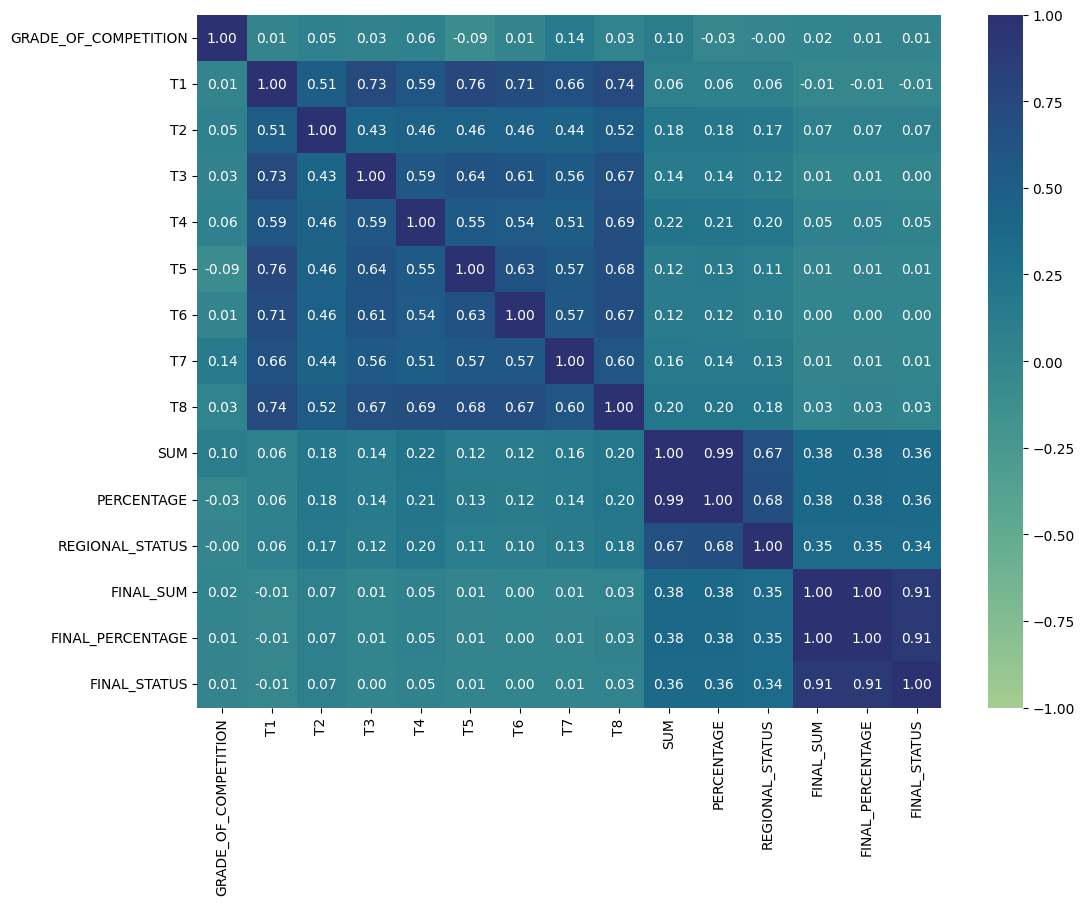

In [41]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.drop(["index", "REGION", "DATA_AVAILABLE", "WINNERS_ONLY", "DISTRICT", "SCHOOL", "AUTHENTIC"], axis=1).corr(),
            annot=True, ax=ax, cmap="crest", fmt = '0.2f', vmin=-1)
plt.show()

Видно, что FINAL_STATUS сильно коррелирует с FINAL_SUM и FINAL_PERCENTAGE. Это нормально, так как призёры и победители определяются по баллам.

Так же REGIONAL_STATUS коррелирует с SUM и PERCENTAGE, однако корреляция между ними не сильная. Это странно, так как победители и призёры должны определяться только по сумме баллов и ничем другим. Более ожидаемо было увидедь очень сильную корреляцию между этими признаками.

Так же значительно коррелируют признаки признаки T1-T8, то есть если если хотя бы одно из заданий выполнено хорошо, остальные скорее всего тоже.
Корреляция между признаками T1-T8 и SUM & PERCENTAGE оказалась довольно низкой, не смотся на то, что на pairplot она хорошо прослеживается.

Как и ожидалось, корреляция между признаками FINAL_SUM & FINAL_PERCENTAGE и T1-T8 оказалась очень низкой.

In [42]:
df.to_csv("Result 2 session.csv", index=False)

Выявлен расчёт всех основных статистических характеристик данных, выявлено следующее:
* SUBJECT - содержит только 1 уникальное значение "русский язык"
* YEAR - содержит только 1 уникальное значение 2021
* GRADE_OF_COMPETITION - значения от 9 до 11
* CODE - имеются повторения, возможно некоторые участники участвовали несколько раз
* REGIONAL_STATUS - 7 уникальных значений
* FINAL_STATUS - 3 уникальных зачения

На построенном hist графике видно примерное распределения признаков, были построены дополнительные графики и подсчитаны stat и p-value для определения нормальности распределения. Распределение ни 1 из признаков не оказалось нормальным, только SUM и PERCENTAGE имеют распределение близкое к нормальному

Построены графики распределения а так же pairplot для визуального поиска зависимостей,
выявленя зависимости между признаками T1-T8, SUM, PERCENTAGE, FINAL_SUM и FINAL_PERCENTAGE
На тепловой карте корреляция подтвердилась.

Дашборд
https://datalens.yandex/1sjbgivg3r1en

# Модуль - В. Обработка и анализ текстовых данных

## Формирование структуры набора данных: 
Определение необходимых полей и создание структуры набора данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Загрузим набор данных с 2 сессии

In [2]:
df = pd.read_csv("Result 2 session.csv", index_col="index")
df.head().T

index                              0                    1                 2  \
REGION                        Адыгея               Адыгея            Адыгея   
DATA_AVAILABLE                  True                 True              True   
WINNERS_ONLY                   False                False             False   
GRADE_OF_COMPETITION               9                    9                 9   
DISTRICT                Город Майкоп  Кошехабльский район  Гиагинский район   
SCHOOL                Гимназия No 22             СОШ No 8          СОШ No 4   
T1                               8.5                  4.5               3.0   
T2                               0.0                  0.0               0.0   
T3                               2.0                  2.0               3.0   
T4                               0.0                  0.0               0.0   
T5                               4.0                  5.5               8.5   
T6                               3.5                  4.5               0.0   
T7                               2.0                  2.0               3.0   
T8                               3.5                  1.5               1.0   
SUM                             23.5                 20.0              18.5   
PERCENTAGE                      26.1                 22.2              20.6   
REGIONAL_STATUS                    2                    2                 2   
AUTHENTIC                        оба                  оба               оба   
FINAL_SUM                        0.0                  0.0               0.0   
FINAL_PERCENTAGE                 0.0                  0.0               0.0   
FINAL_STATUS                       0                    0                 0   

index                                       3                        4  
REGION                                 Адыгея                   Адыгея  
DATA_AVAILABLE                           True                     True  
WINNERS_ONLY                            False                    False  
GRADE_OF_COMPETITION                        9                        9  
DISTRICT              Красногвардейский район  Красногвардейский район  
SCHOOL                          Гимназия No 1                 СОШ No 2  
T1                                        5.5                      8.5  
T2                                        1.0                      0.0  
T3                                        1.0                      2.0  
T4                                        3.0                      0.0  
T5                                        5.5                      4.5  
T6                                        0.5                      0.0  
T7                                        0.0                      0.0  
T8                                        1.5                      1.0  
SUM                                      18.0                     16.0  
PERCENTAGE                               20.0                     17.8  
REGIONAL_STATUS                             2                        2  
AUTHENTIC                                 оба                      оба  
FINAL_SUM                                 0.0                      0.0  
FINAL_PERCENTAGE                          0.0                      0.0  
FINAL_STATUS                                0                        0

## Предварительная обработка данных

## Векторизация текстовых данных

## Кластеризация

In [3]:
df.drop(labels=["REGION", "DATA_AVAILABLE", "WINNERS_ONLY", "DISTRICT", "SCHOOL", "AUTHENTIC"], axis=1, inplace=True)

Использеум MinMaxScaler для маштабирования данных, так как данные имеют больший разброс. 
Масштабирование повысит точность кластеризации и классификации.

In [4]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df);

In [5]:
scaled_data = minMaxScaler.transform(df)
df = pd.DataFrame(data=scaled_data, columns=df.columns, index=df.index)

Проверим полученный результат, выведем статистическую информацию

In [6]:
df.describe().T

count      mean       std  min       25%       50%  \
GRADE_OF_COMPETITION  12515.0  0.495046  0.407271  0.0  0.000000  0.500000   
T1                    12515.0  0.108247  0.191339  0.0  0.000000  0.000000   
T2                    12515.0  0.022708  0.083326  0.0  0.000000  0.000000   
T3                    12515.0  0.088391  0.196256  0.0  0.000000  0.000000   
T4                    12515.0  0.045065  0.135432  0.0  0.000000  0.000000   
T5                    12515.0  0.064141  0.135377  0.0  0.000000  0.000000   
T6                    12515.0  0.060564  0.135378  0.0  0.000000  0.000000   
T7                    12515.0  0.056135  0.142893  0.0  0.000000  0.000000   
T8                    12515.0  0.056253  0.130593  0.0  0.000000  0.000000   
SUM                   12515.0  0.269498  0.162723  0.0  0.150259  0.248705   
PERCENTAGE            12515.0  0.289775  0.174175  0.0  0.161111  0.267667   
REGIONAL_STATUS       12515.0  0.565322  0.143926  0.0  0.500000  0.500000   
FINAL_SUM             12515.0  0.015747  0.104572  0.0  0.000000  0.000000   
FINAL_PERCENTAGE      12515.0  0.016477  0.109048  0.0  0.000000  0.000000   
FINAL_STATUS          12515.0  0.018698  0.125950  0.0  0.000000  0.000000   

                           75%  max  
GRADE_OF_COMPETITION  1.000000  1.0  
T1                    0.178571  1.0  
T2                    0.000000  1.0  
T3                    0.000000  1.0  
T4                    0.000000  1.0  
T5                    0.000000  1.0  
T6                    0.000000  1.0  
T7                    0.000000  1.0  
T8                    0.000000  1.0  
SUM                   0.367876  1.0  
PERCENTAGE            0.394778  1.0  
REGIONAL_STATUS       0.750000  1.0  
FINAL_SUM             0.000000  1.0  
FINAL_PERCENTAGE      0.000000  1.0  
FINAL_STATUS          0.000000  1.0

Так как прихнаков не мало, уменьшим размерность набора данных для упрощения анализа и уменьшения вычислительной сложности

In [7]:
from sklearn.decomposition import PCA
pca = PCA(2, random_state=42)
x_pca = pca.fit_transform(df)
np.shape(x_pca)

(12515, 2)

Найдём наилучшее количество кластеров для кластеразации с помощью метода локтя

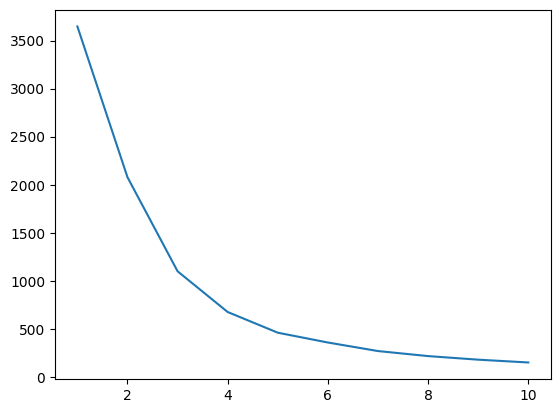

In [8]:
from sklearn.cluster import KMeans
wgss = []

for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=0, n_init=10)
    kmean.fit(x_pca)
    wgss.append(kmean.inertia_)

plt.plot(range(1, 11), wgss);
plt.show()

На гафике видно перелом на 3 кластерах, возьмём это значение для обучения моделей

Обучим модель KMeans с 3 кластерами

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df["kmeans"] = kmeans.fit_predict(x_pca)

Построим график распределения кластеров в kmeans и просмотрим, как распределились данные

kmeans
2    5062
1    4041
0    3412
Name: count, dtype: int64


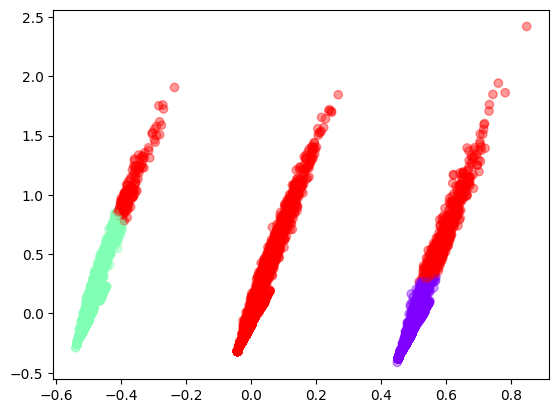

In [10]:
print(df["kmeans"].value_counts())
plt.scatter(x_pca[:,0], x_pca[:,1], c=df["kmeans"], cmap='rainbow', alpha=0.4)
plt.show()

Большая часть записей отнесена к 1 классу. Меньше всего записей отнесено к 3 кластеру. Остальные записи были отнесены к 2 кластеру.

Попробуем кластерезировать данные с помощью модели Brich, так же установим 3 кластера

In [11]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=3)
df["birch"] = birch.fit_predict(x_pca)

Построим график распределения кластеров в birch и просмотрим, как распределились данные

birch
0    6931
2    3885
1    1699
Name: count, dtype: int64


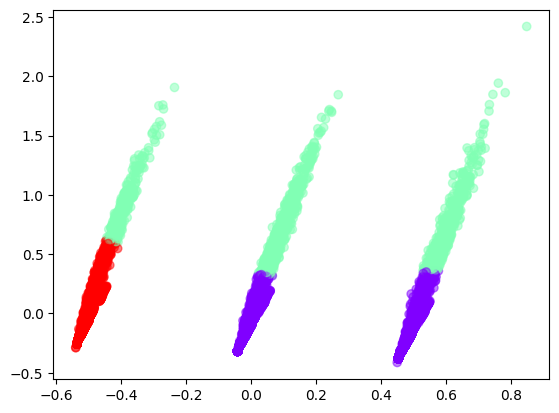

In [12]:
print(df["birch"].value_counts())
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df["birch"], cmap="rainbow", alpha=0.5)
plt.show()

Модель birch отнесла большую часть записей отнесены к 1 кластеру, меньше всего записей отнесены к 1 кластеру, остальные записи отнесены к 2 кластеру.
Это распределение очень похоже на распределение от kmeans

Так же попробуем кластерезировать данные с помощью модели GaussianMixture

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42).fit(x_pca)
df["gaussian_mixture"] = gmm.predict(x_pca)

Построим график распределения кластеров в gaussian_mixture и просмотрим, как распределились данные

gaussian_mixture
2    5419
1    4201
0    2895
Name: count, dtype: int64


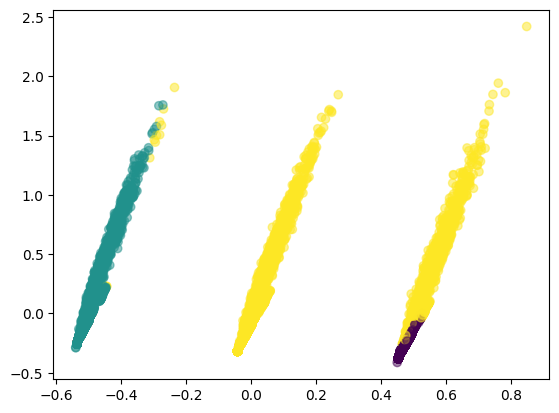

In [14]:
print(df["gaussian_mixture"].value_counts())
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df["gaussian_mixture"], alpha=0.5)
plt.show()

Не смотря на огромное преобладание жёлтых цветов, кластеры распределены отностильно равномерно.
Половина записей отнесена к 1 кластеру, чуть больше четверти к 2 кластеру, а оставшиеся к 3 кластеру.

### Метрики качества кластеризации

Silhouette Score (подходит для определения оптимального количества кластеров)
* Оценивает кучность кластеров, основан на среднем расстоянии между точками внутри кластера и ближайшими точками другого кластера
* Диапазон значений от -1 до 1
* Чем выше, тем лучше кластеризация

Calinski-Harabasz Score (хорош для сравнения разных моделей кластеризации)
* Оценивает компактность (малая дисперсия внутри классов) и разделённость (большая дисперсия между кластерами) кластеров
* Чем выше, тем лучше кластеризация
* Нет фиксированного диапазона значений

Davies-Bouldin Score (полезен, когда важна не только разделённость, но и компактность)
* Оценивает среднее расстояние между кластерами и их размер (компактность классов)
* Диапазон значений от 0
* Чем меньше, тем лучше кластеризация

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans_s = silhouette_score(df, df["kmeans"])
kmeans_ch = calinski_harabasz_score(df, df["kmeans"])
kmeans_db = davies_bouldin_score(df, df["kmeans"])

birch_s = silhouette_score(df, df["birch"])
birch_ch = calinski_harabasz_score(df, df["birch"])
birch_db = davies_bouldin_score(df, df["birch"])

gaussian_mixture_s = silhouette_score(df, df["gaussian_mixture"])
gaussian_mixture_ch = calinski_harabasz_score(df, df["gaussian_mixture"])
gaussian_mixture_db = davies_bouldin_score(df, df["gaussian_mixture"])

In [16]:
models = {
    "kmeans" : (kmeans_s, kmeans_ch, kmeans_db),
    "birch" : (birch_s, birch_ch, birch_db),
    "gaussian_mixture" : (gaussian_mixture_s, gaussian_mixture_ch, gaussian_mixture_db)
}

print("| Model            | silhouette_score | calinski_harabasz_score | davies_bouldin_score |")
print("|------------------|------------------|-------------------------|----------------------|")

for model, (s, ch, db) in models.items():
    print(f"| {model:<16} | {s:<16.2f} | {db:<23.2f} | {ch:<20.2f} |")

| Model            | silhouette_score | calinski_harabasz_score | davies_bouldin_score |
|------------------|------------------|-------------------------|----------------------|
| kmeans           | 0.67             | 0.51                    | 23145.76             |
| birch            | 0.39             | 1.16                    | 5307.66              |
| gaussian_mixture | 0.66             | 0.54                    | 22042.57             |


Оценим показатели моделей
* Silhouette score - значения схожи. Лучшее у модели kmeans
* Calinski-Harabasz score - лучшей моделью является gaussia_mixture
* Davies-Bouldin score - лучшей моделью так же является gaussia_mixtureScore

Определим отличительные черты каждого кластера.

Выведем тепловую карту средних значений по каждому признаку и кластеру, так можно будет отличить кластеры друг от друга.

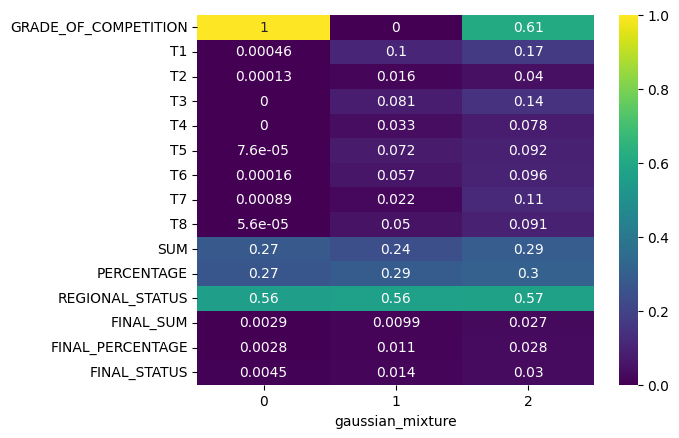

In [17]:
cluster_stats = df.drop(["kmeans", "birch"], axis=1).groupby("gaussian_mixture").mean()
sns.heatmap(cluster_stats.T, annot=True, cmap="viridis")
plt.show()

На данной тепловой карте хорошо видны различия по признаку GRADE_OF_COMPETITION (номер класса):
* кластер под номером 0 имеет самые низкие значения GRADE_OF_COMPETITION 1.00 (11 класс)
* кластер под номером 1 имеет наивысшие значения по признаку GRADE_OF_COMPETITION 0 (9 класс)
* кластер под номером 2 имеет средние значения по признаку GRADE_OF_COMPETITION ~ 0.61 (~ 10-11 класс)

Так же видны различия по признакам T1-T8 (Задания 1-8):
* кластер под номером 0 имеет самые низкие значения (около нулевые)
* кластер под номером 1 имеет средние значения по признаку
* кластер под номером 2 имеет высокие значения по признаку

Таким образом, кластеры можно классифицировать, ориентируясь на признаи T1-T8 и GRADE_OF_COMPETITION

### Классификация

In [19]:
y = df["gaussian_mixture"]
x = df.drop(["kmeans", "birch", "gaussian_mixture"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

df.sample().T

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Обучим модель RandomForestClassifier для предсказания кластеров.

In [27]:
rfc = RandomForestClassifier(random_state=42, max_depth=3)
rfc.fit(x_train, y_train);

Обучим модель и посмотрим её метрики

In [30]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9917675544794189

Модель меет очень высокую точность, вероятно переобучение

#### Я не планирую этого делать, просто хотел узнать, почему такая высокая точность. Модель просто "запоминают" алгоритм, созданный при кластеризации

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

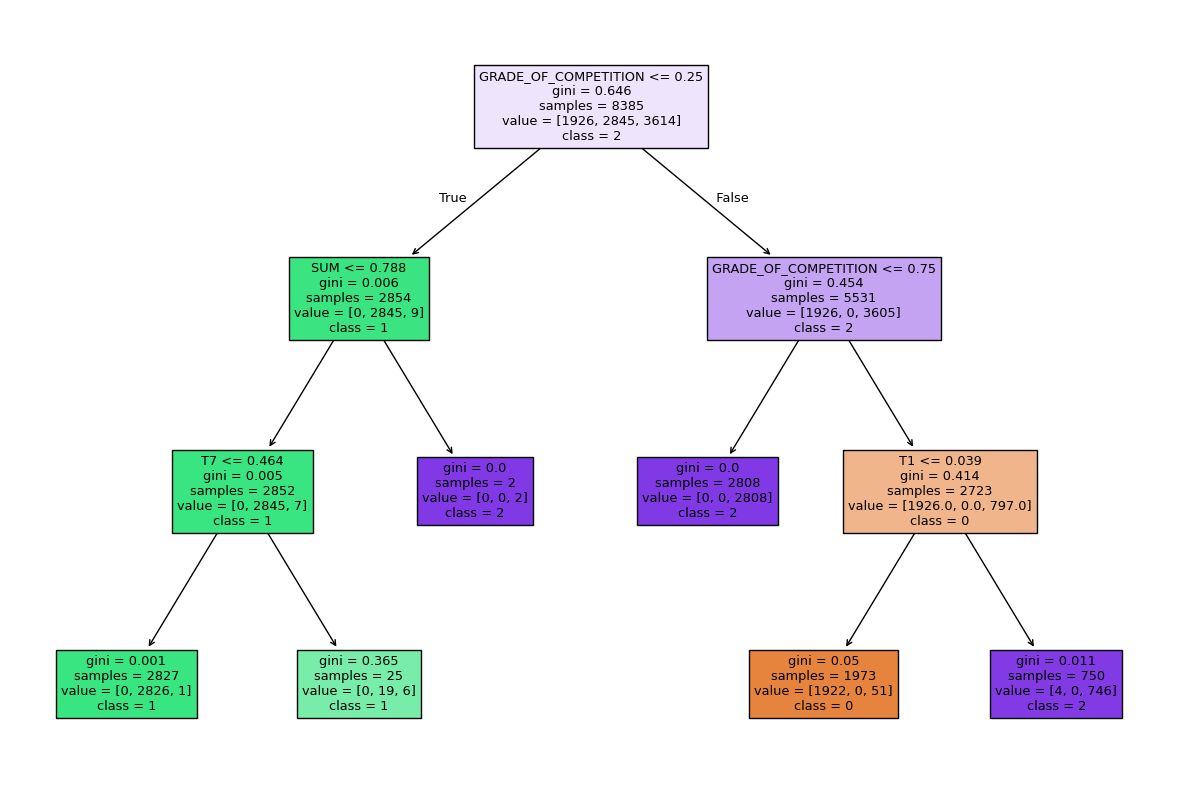

In [34]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_clf.fit(x_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(tree_clf, feature_names=x.columns, class_names=["0", "1", "2"], filled=True)
plt.show()